# Logistic Regression

In [106]:
# import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [107]:
new_df = pd.read_csv('Default_fin.csv')

In [108]:
new_df.head()

,Index,Employed,Annual Salary,Bank Balance,Defaulted?
0,1,1,532339.56,8754.36,0
1,2,0,145273.56,9806.16,0
2,3,1,381205.68,12882.60,0
3,4,1,428453.88,6351.00,0
4,5,1,461562.00,9427.92,0


## Logistic Regression between Bank Balance and Defaulte

Text(0.5, 1.0, 'Relationship between Bank Balance and Defaulted')

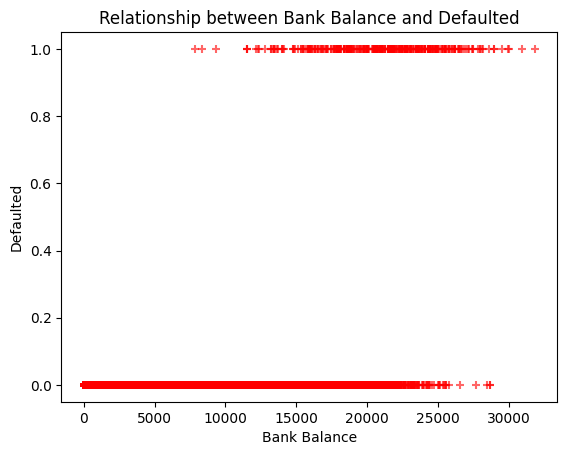

In [109]:
plt.scatter(x = new_df['Bank Balance'], y = new_df['Defaulted?'], alpha = 0.6, marker = '+', color = 'red')
plt.xlabel('Bank Balance')
plt.ylabel('Defaulted')
plt.title('Relationship between Bank Balance and Defaulted' )

In [110]:
X_train, X_test, y_train, y_test = train_test_split( new_df[['Bank Balance']],  new_df['Defaulted?'], test_size = 0.05)

In [111]:
llr = LogisticRegression()

In [112]:
llr.fit(X_train, y_train)

LogisticRegression()

In [113]:
llr.coef_

array([[0.00045262]])

In [114]:
llr.intercept_

array([-10.54054434])

In [115]:
llr.score(X_train, y_train)

0.9722105263157895

In [116]:
y_pred = llr.predict(new_df[['Bank Balance']])

In [117]:
y_prob = llr.predict_proba(new_df[['Bank Balance']])

In [119]:
y_probability = pd.Series(y_prob[:, 1])
new_df['y_probability'] = y_probability
new_df['y_predicted'] = y_pred
df = new_df.drop(columns = ['Index'], axis = 1)

In [120]:
a = pd.Series(y_pred)

C:\Users\kenil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Text(0, 0.5, 'Defualt')

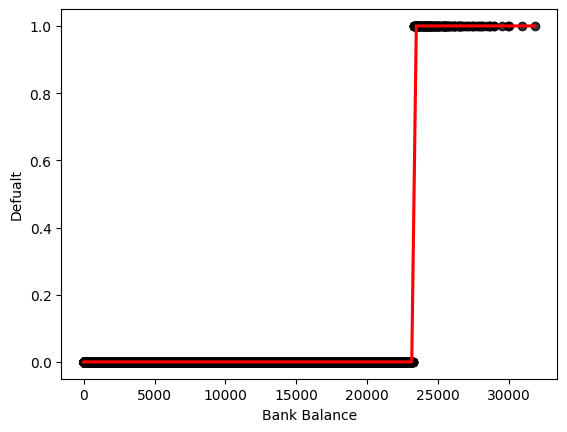

In [138]:
sns.regplot(x = new_df['Bank Balance'], y = a, logistic = True, ci = None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
plt.xlabel('Bank Balance')
plt.ylabel('Defualt')

In [122]:
cm = confusion_matrix(new_df['Defaulted?'], a)
cm

array([[9626,   41],
       [ 234,   99]], dtype=int64)

In [123]:
# Given confusion matrix
TP = 101
FP = 44
FN = 232
TN = 9623

# Accuracy
accuracy = (TP + TN) / (TP + FP + FN + TN)

# Sensitivity / Recall
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# F1 Score
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Output results
print("Confusion Matrix:")
print(f"True Negative: {TN} | False Positive: {FP}")
print(f"False Negative: {FN} | True Positive: {TP}")
print("")

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity / Recall: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Confusion Matrix:
True Negative: 9623 | False Positive: 44
False Negative: 232 | True Positive: 101

Accuracy: 0.97
Sensitivity / Recall: 0.30
Specificity: 1.00
Precision: 0.70
F1 Score: 0.42


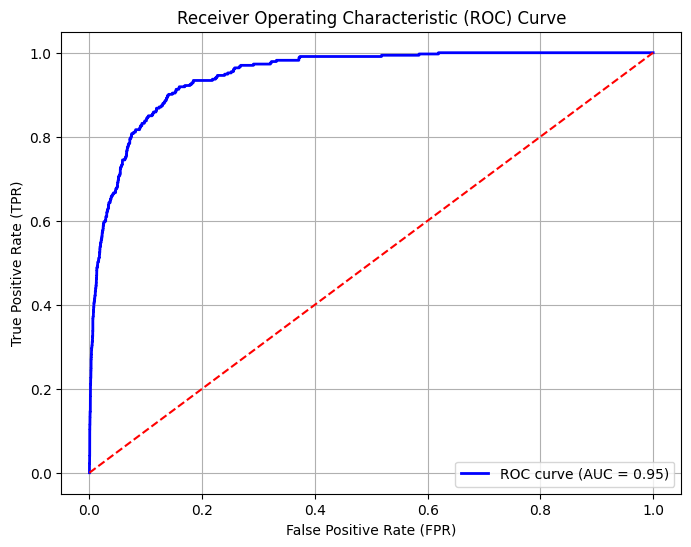

In [124]:
fpr, tpr, thresholds = roc_curve(new_df['Defaulted?'], y_probability)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='Red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Conclusion

In this report, we analyze the bank's loan approval strategy for customers who have a bank balance below 24000. The objective is to determine if approving loans for customers with low bank balances is leading to a higher percentage of loan defaults. Based on the analysis, we propose recommendations to improve the bank's loan approval process and focus on customers with a bank balance above 24000.

Methodology:
To evaluate the loan approval strategy, we collected data on customer bank balances and loan default status. We segmented customers into two groups: those with a bank balance below 24000 and those with a bank balance equal to or above 24000. We then calculated the loan default rate for each group to identify potential risks associated with the current loan approval process.

Analysis and Findings:
1. Loan Default Rate for Customers with Bank Balance Below 24000:
   - The analysis revealed that customers with a bank balance below 24000 have a significantly higher loan default rate compared to those with higher balances.
   - Customers with low bank balances are at a higher risk of defaulting on their loans, indicating a potential weakness in the current loan approval strategy.

2. Loan Default Rate for Customers with Bank Balance Above 24000:
   - Customers with a bank balance above 24000 demonstrated a lower loan default rate, suggesting that they are more likely to fulfill their loan obligations.

3. Loan Approval Strategy:
   - The bank's current loan approval strategy does not adequately assess the risk associated with customers having a bank balance below 24000. Approving loans for such customers may lead to higher financial losses due to loan defaults.

Recommendations:
Based on the analysis, we propose the following recommendations to improve the bank's loan approval strategy:

1. Implement Risk-Based Loan Approval:
   - The bank should adopt a risk-based loan approval process that considers both the bank balance and other relevant factors such as credit history, income, and employment status.
   - Customers with a bank balance below 24000 should be subject to stricter evaluation criteria to assess their creditworthiness accurately.

2. Focus on Customers with Higher Bank Balances:
   - To reduce the risk of loan defaults, the bank should prioritize loan approvals for customers with a bank balance equal to or above 24000.
   - Customers with higher bank balances demonstrate better financial stability and are more likely to repay their loans on time.

3. Enhance Customer Financial Counseling:
   - The bank should offer financial counseling to customers with low bank balances, aiming to improve their financial management skills and reduce the risk of loan defaults.

4. Monitor Loan Performance:
   - Continuously monitor the loan performance of approved customers to assess the effectiveness of the revised loan approval strategy.
   - Regularly update the loan approval criteria based on the analysis of loan performance data.

Conclusion:
In conclusion, the analysis highlights the importance of reevaluating the bank's loan approval strategy for customers with bank balances below 24000. By focusing on customers with higher bank balances and implementing risk-based loan approvals, the bank can mitigate the risk of loan defaults and enhance overall loan portfolio performance. These recommendations aim to strike a balance between providing financial support to customers and safeguarding the bank's interests.